In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Harry Potter Crest Image Classifier
This is a fun little project I made while going through fast.ai documentation. <br/>
In this notebook, we will be attempting to make a harry potter crest classifier using the fast.ai liberary. <br/>
We will have the following label classes: 
- gry: Gryffindor
- sly: Slytherin
- huf: Hufflepuff
- rav: Ravenclaw

In [17]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *
import warnings
import numpy as np
import os
import torch

In [40]:
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [19]:
# Gather and preprocess data
path = "./data"    # Path for image dataset
classes = ['gry', 'rav', 'huf', 'sly']        # Label categories


## Preprocessing Data:
After <a href="https://drive.google.com/drive/folders/1c7mLyurkClzoQR7dsJKHIXR6WR87hWM8?usp=sharing">Downloading the dataset</a>we have placed it in the current working dir. <br/>
There is a cleaned.csv file which containes the labels and image name. We will be using this csv file to filter the image dataset

In [23]:
path="./data/"
np.random.seed(43)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv', ds_tfms=get_transforms(), size=224, num_workers=4, bs=16).normalize(imagenet_stats)

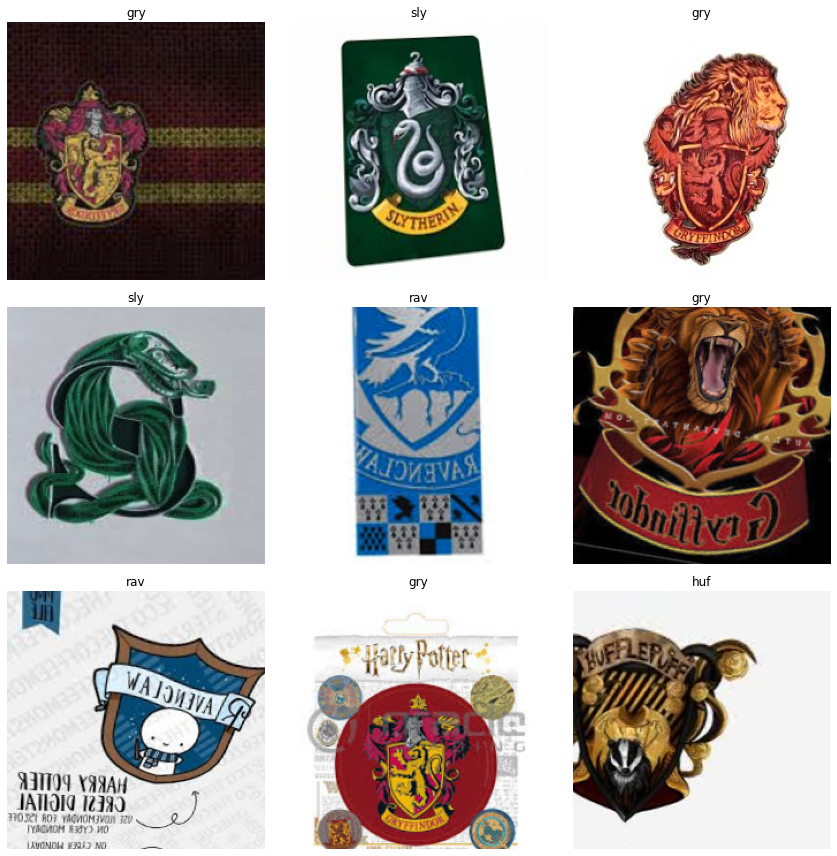

In [62]:
data.show_batch(rows=3, size=(7, 10))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gry', 'huf', 'rav', 'sly'], 4, 614, 153)

## Training Model
We will be using resnet34 arcitecture and training it on 6 epochs. The learning rate is between the range of 3e-5 and 3e-4. After training on fine tuned models, we take used the lr_find() method to take a look at the learning rate and loss graph and thereafter we have concluded this range.

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [25]:
learn.unfreeze()

In [63]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [26]:
learn.fit_one_cycle(6, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.991260,1.107892,0.477124,01:26
1,1.199631,0.443217,0.183007,01:26
2,0.707951,0.418095,0.156863,01:25
3,0.471708,0.363188,0.124183,01:23
4,0.317013,0.392478,0.124183,01:25
5,0.238583,0.369458,0.124183,01:24


In [27]:
learn.save('stage-final')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

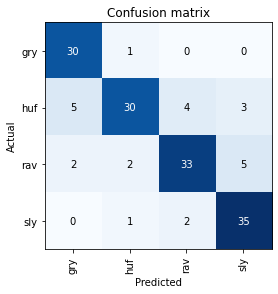

In [13]:
interp.plot_confusion_matrix()

In [29]:
interp.most_confused()

[('huf', 'rav', 4),
 ('rav', 'sly', 3),
 ('huf', 'gry', 2),
 ('huf', 'sly', 2),
 ('sly', 'gry', 2),
 ('gry', 'huf', 1),
 ('gry', 'sly', 1),
 ('rav', 'gry', 1),
 ('rav', 'huf', 1),
 ('sly', 'huf', 1),
 ('sly', 'rav', 1)]

## Testing
Lets export our model and see how it does on some images it has never seen before. We have a decent validation loss of 0.36. Let us see how it does on some easy images. We pick an image(s) and pass it to ImageDataBunch for preprocessing. 

In [30]:
learn.export()

In [31]:
defaults.device = torch.device('cpu')

Prediction Result: rav
Prediction Result: huf
Prediction Result: gry
Prediction Result: sly


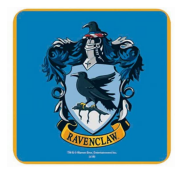

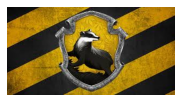

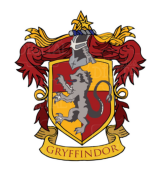

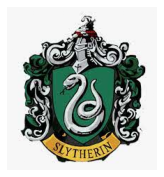

In [57]:
tst_folder = os.path.join(path, 'test')
test_images = list(sorted(os.listdir(os.path.join(path, 'test'))))
learn = load_learner(path)
for img in test_images:
    tst = open_image(os.path.join(tst_folder, img))
    tst.show()
    pred_class,pred_idx,outputs = learn.predict(tst)
    print(f"Prediction Result: {pred_class.obj}")

    